In [105]:
!pip install pycountry
!pip install langdetect
!pip install better_profanity

     |████████████████████████████████| 46 kB 2.2 MB/s 


In [2]:
d = pd.DataFrame()
a = [{"a": 1, "b": 2}, {"a": 1, "b": 3}]
for b in a:
  d = d.append(b, ignore_index=True)
d

NameError: ignored

In [4]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [108]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
  
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from better_profanity import profanity

In [18]:
consumer_key = 'V560JrQMFmViSS6anmDI5XY5K'
consumer_secret = "dnV4avXiQ05Vs3tEictPkt5TJ7E78yoNj0uCwNOm3O6u9fHsrg"
access_token = "1254361766957649925-Q6iFxOGs7wUJHzETOBk9rmT8rEr8w9"
access_token_secret =  "ebaAjVvh5dQIzOOqY3GLnxkRxzQGN36Db0na2BeREJFvA"

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
tweepy.API()

In [ ]:
api.search_full_archive(("dairy", query = "Donald Trump", maxResults=10))

[Status(_api=<tweepy.api.API object at 0x7f0907c57690>, _json={'created_at': 'Fri May 13 19:27:49 +0000 2022', 'id': 1525196134104412161, 'id_str': '1525196134104412161', 'text': "RT @realLizUSA: NEW!\n\nPresident Donald J. Trump:\n\n“The Democrats are sending another $40 billion to Ukraine, yet America's parents are stru…", 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 26116773, 'id_str': '26116773', 'name': 't', 'screen_name': 'ttmalek', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 289, 'friends_count': 1623, 'listed_count': 3, 'favourites_count': 96903, 'statuses_count': 76206, 'created_at': 'Mon Mar 23 23:12:37 +0000 2009', 'utc_offset': None, 'time_

In [ ]:
class ThirtyDaySearch(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'V560JrQMFmViSS6anmDI5XY5K'
        consumer_secret = "dnV4avXiQ05Vs3tEictPkt5TJ7E78yoNj0uCwNOm3O6u9fHsrg"
        access_token = "1254361766957649925-Q6iFxOGs7wUJHzETOBk9rmT8rEr8w9"
        access_token_secret =  "ebaAjVvh5dQIzOOqY3GLnxkRxzQGN36Db0na2BeREJFvA"
        self.df = pd.DataFrame()
  
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
    
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  

    def get_tweets(self, query, count = 100):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
  
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search_30_day(label="dairy30", query=query, maxResults = count)
  
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
                parsed_tweet["created_at"] = tweet.created_at
  
                # saving text of tweet
                parsed_tweet['text'] = tweet.text

                parsed_tweet["coord"] = tweet.coordinates
                parsed_tweet["place"] = tweet.place

                parsed_tweet["entities"] = tweet.entities
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
  
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
  
            for tweet_deet in tweets:
              self.df = self.df.append(tweet_deet)
  
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

In [ ]:
from datetime import datetime, timedelta
today = datetime. today()
yesterday = today - timedelta(days=1)
one_week_ago = today - timedelta(days=7)
thirty_days_ago = today - timedelta(days=30)
format = thirty_days_ago.strftime("%Y%m%d%H%m")
format

'202204132004'

In [ ]:
str(thirty_days_ago).split(" ")[0]

'2022-04-13'

In [ ]:
class FullMetalArchive(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'V560JrQMFmViSS6anmDI5XY5K'
        consumer_secret = "dnV4avXiQ05Vs3tEictPkt5TJ7E78yoNj0uCwNOm3O6u9fHsrg"
        access_token = "1254361766957649925-Q6iFxOGs7wUJHzETOBk9rmT8rEr8w9"
        access_token_secret =  "ebaAjVvh5dQIzOOqY3GLnxkRxzQGN36Db0na2BeREJFvA"
        self.df = pd.DataFrame()
  
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
    
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  

    def get_tweets(self, query, count = 100):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
  
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search_full_archive(environment_name="dairy", query = query, maxResults = count, toDate = format)
  
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                
                parsed_tweet = {}
                parsed_tweet["created_at"] = tweet.created_at

                # saving text of tweet
                parsed_tweet['text'] = tweet.text

                parsed_tweet["coord"] = tweet.coordinates
                parsed_tweet["place"] = tweet.place

                parsed_tweet["entities"] = tweet.entities
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                  # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                      tweets.append(parsed_tweet)
                else:
                  tweets.append(parsed_tweet)
  
            for tweet_deet in tweets:
              self.df = self.df.append(tweet_deet)
  
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
            raise TypeError

In [8]:
def comb(hashtags, place):
    return hashtags + [place]

In [9]:
def ludicrous(hashtag1, place):
  from nltk import ngrams
  from itertools import permutations

  keywords = []

  hashtag1.append(place)
  for perm in permutations(hashtag1):
    print(perm)
    for i in range(3, len(perm)+1):
      keygrams = ngrams(perm, i)
      for key in keygrams:
        ngr = " ".join(key)
        if ngr not in keywords:
          keywords += [ngr]
  
  return keywords

In [10]:
len(ludicrous(["butter", "milk", "farming"], "ireland"))

('butter', 'milk', 'farming', 'ireland')
('butter', 'milk', 'ireland', 'farming')
('butter', 'farming', 'milk', 'ireland')
('butter', 'farming', 'ireland', 'milk')
('butter', 'ireland', 'milk', 'farming')
('butter', 'ireland', 'farming', 'milk')
('milk', 'butter', 'farming', 'ireland')
('milk', 'butter', 'ireland', 'farming')
('milk', 'farming', 'butter', 'ireland')
('milk', 'farming', 'ireland', 'butter')
('milk', 'ireland', 'butter', 'farming')
('milk', 'ireland', 'farming', 'butter')
('farming', 'butter', 'milk', 'ireland')
('farming', 'butter', 'ireland', 'milk')
('farming', 'milk', 'butter', 'ireland')
('farming', 'milk', 'ireland', 'butter')
('farming', 'ireland', 'butter', 'milk')
('farming', 'ireland', 'milk', 'butter')
('ireland', 'butter', 'milk', 'farming')
('ireland', 'butter', 'farming', 'milk')
('ireland', 'milk', 'butter', 'farming')
('ireland', 'milk', 'farming', 'butter')
('ireland', 'farming', 'butter', 'milk')
('ireland', 'farming', 'milk', 'butter')


48

In [11]:
def plaid(hashtag2, place):
    from nltk import ngrams
    from itertools import permutations

    keywords = []

    for word in hashtag2:
      keywords.append(word)

    hashtag2 += [place]

    for perm in permutations(hashtag2):
        for i in range(2, len(perm)+1):
            keygrams = ngrams(perm, i)
            for key in keygrams:
                ngr = " ".join(key)
                if ngr not in keywords:
                    keywords.append(ngr)
  
    return keywords

In [12]:
len(plaid(["butter", "milk", "farming"], "ireland"))

63

In [13]:
plaid(["butter", "milk", "farming"], "ireland")

['butter',
 'milk',
 'farming',
 'butter milk',
 'milk farming',
 'farming ireland',
 'butter milk farming',
 'milk farming ireland',
 'butter milk farming ireland',
 'milk ireland',
 'ireland farming',
 'butter milk ireland',
 'milk ireland farming',
 'butter milk ireland farming',
 'butter farming',
 'farming milk',
 'butter farming milk',
 'farming milk ireland',
 'butter farming milk ireland',
 'ireland milk',
 'butter farming ireland',
 'farming ireland milk',
 'butter farming ireland milk',
 'butter ireland',
 'butter ireland milk',
 'ireland milk farming',
 'butter ireland milk farming',
 'butter ireland farming',
 'ireland farming milk',
 'butter ireland farming milk',
 'milk butter',
 'milk butter farming',
 'milk butter farming ireland',
 'milk butter ireland',
 'milk butter ireland farming',
 'farming butter',
 'milk farming butter',
 'farming butter ireland',
 'milk farming butter ireland',
 'ireland butter',
 'farming ireland butter',
 'milk farming ireland butter',
 'milk

In [14]:
hashtags

NameError: ignored

In [15]:
ludicrous(["butter", "milk", "farming"], "ireland")

('butter', 'milk', 'farming', 'ireland')
('butter', 'milk', 'ireland', 'farming')
('butter', 'farming', 'milk', 'ireland')
('butter', 'farming', 'ireland', 'milk')
('butter', 'ireland', 'milk', 'farming')
('butter', 'ireland', 'farming', 'milk')
('milk', 'butter', 'farming', 'ireland')
('milk', 'butter', 'ireland', 'farming')
('milk', 'farming', 'butter', 'ireland')
('milk', 'farming', 'ireland', 'butter')
('milk', 'ireland', 'butter', 'farming')
('milk', 'ireland', 'farming', 'butter')
('farming', 'butter', 'milk', 'ireland')
('farming', 'butter', 'ireland', 'milk')
('farming', 'milk', 'butter', 'ireland')
('farming', 'milk', 'ireland', 'butter')
('farming', 'ireland', 'butter', 'milk')
('farming', 'ireland', 'milk', 'butter')
('ireland', 'butter', 'milk', 'farming')
('ireland', 'butter', 'farming', 'milk')
('ireland', 'milk', 'butter', 'farming')
('ireland', 'milk', 'farming', 'butter')
('ireland', 'farming', 'butter', 'milk')
('ireland', 'farming', 'milk', 'butter')


['butter milk farming',
 'milk farming ireland',
 'butter milk farming ireland',
 'butter milk ireland',
 'milk ireland farming',
 'butter milk ireland farming',
 'butter farming milk',
 'farming milk ireland',
 'butter farming milk ireland',
 'butter farming ireland',
 'farming ireland milk',
 'butter farming ireland milk',
 'butter ireland milk',
 'ireland milk farming',
 'butter ireland milk farming',
 'butter ireland farming',
 'ireland farming milk',
 'butter ireland farming milk',
 'milk butter farming',
 'milk butter farming ireland',
 'milk butter ireland',
 'milk butter ireland farming',
 'milk farming butter',
 'farming butter ireland',
 'milk farming butter ireland',
 'farming ireland butter',
 'milk farming ireland butter',
 'milk ireland butter',
 'ireland butter farming',
 'milk ireland butter farming',
 'ireland farming butter',
 'milk ireland farming butter',
 'farming butter milk',
 'farming butter milk ireland',
 'farming butter ireland milk',
 'farming milk butter',


In [22]:
tweet_list = []
while True:
  try:
      # create OAuthHandler object
      auth = OAuthHandler(consumer_key, consumer_secret)
      # set access token and secret
      auth.set_access_token(access_token, access_token_secret)
      # create tweepy API object to fetch tweets
      api = tweepy.API(auth)
      break
  except:
      print("Error: Authentication Failed")
hashtags = input("Please enter keyword or hashtag to search: ").split()
place = input("Please enter areas of interest for above (first answer only): ").split()[0]
print(1, hashtags)
tags = plaid(hashtags, place)
print(2, hashtags)
hash = ludicrous(hashtags[:-1], place)

Please enter keyword or hashtag to search: milk dairy farming
Please enter areas of interest for above (first answer only): ireland
1 ['milk', 'dairy', 'farming']
2 ['milk', 'dairy', 'farming', 'ireland']
('milk', 'dairy', 'farming', 'ireland')
('milk', 'dairy', 'ireland', 'farming')
('milk', 'farming', 'dairy', 'ireland')
('milk', 'farming', 'ireland', 'dairy')
('milk', 'ireland', 'dairy', 'farming')
('milk', 'ireland', 'farming', 'dairy')
('dairy', 'milk', 'farming', 'ireland')
('dairy', 'milk', 'ireland', 'farming')
('dairy', 'farming', 'milk', 'ireland')
('dairy', 'farming', 'ireland', 'milk')
('dairy', 'ireland', 'milk', 'farming')
('dairy', 'ireland', 'farming', 'milk')
('farming', 'milk', 'dairy', 'ireland')
('farming', 'milk', 'ireland', 'dairy')
('farming', 'dairy', 'milk', 'ireland')
('farming', 'dairy', 'ireland', 'milk')
('farming', 'ireland', 'milk', 'dairy')
('farming', 'ireland', 'dairy', 'milk')
('ireland', 'milk', 'dairy', 'farming')
('ireland', 'milk', 'farming', 'dai

In [23]:
len(tags)

63

In [24]:
len(hash)

48

In [ ]:
api2.df

""


In [ ]:
len(negative_list)

1459

In [ ]:
len(positive_list)

2462

In [ ]:
word

'milk ireland dairy europe farming'

In [ ]:
tags

['dairy',
 'milk',
 'farming',
 'ireland',
 'europe',
 'dairy milk',
 'milk farming',
 'farming ireland',
 'ireland europe',
 'dairy milk farming',
 'milk farming ireland',
 'farming ireland europe',
 'dairy milk farming ireland',
 'milk farming ireland europe',
 'dairy milk farming ireland europe',
 'farming europe',
 'europe ireland',
 'milk farming europe',
 'farming europe ireland',
 'dairy milk farming europe',
 'milk farming europe ireland',
 'dairy milk farming europe ireland',
 'milk ireland',
 'ireland farming',
 'dairy milk ireland',
 'milk ireland farming',
 'ireland farming europe',
 'dairy milk ireland farming',
 'milk ireland farming europe',
 'dairy milk ireland farming europe',
 'europe farming',
 'milk ireland europe',
 'ireland europe farming',
 'dairy milk ireland europe',
 'milk ireland europe farming',
 'dairy milk ireland europe farming',
 'milk europe',
 'dairy milk europe',
 'milk europe farming',
 'europe farming ireland',
 'dairy milk europe farming',
 'milk e

In [6]:
df = pd.DataFrame()

In [36]:
from datetime import datetime, timedelta
today = datetime. today()
two_weeks_ago = today - timedelta(days=15)
four_weeks_ago = today - timedelta(weeks=4)
format30 = thirty_days_ago.strftime("%Y%m%d%H%m")
format15 = two_weeks_ago.strftime("%Y%m%d%H%m")

In [37]:
tweet_list = []

In [38]:
import time

for gram in tags:
  try:
    # call twitter api to fetch tweets
    fetched_tweets = api.search_30_day(environment_name="dairy30", query=gram, maxResults = 100, fromDate=format15)
  
    # parsing tweets one by one
    for tweet in fetched_tweets:
  
      # empty dictionary to store required params of a tweet
      parsed_tweet = {}
      parsed_tweet["created_at"] = tweet.created_at
  
      # saving text of tweet
      parsed_tweet['text'] = tweet.text

      parsed_tweet["coord"] = tweet.coordinates
      parsed_tweet["place"] = tweet.place

      parsed_tweet["entities"] = tweet.entities
  
      # appending parsed tweet to tweets list
      if tweet.retweet_count > 0:
        # if tweet has retweets, ensure that it is appended only once
        if parsed_tweet not in tweet_list:
            tweet_list.append(parsed_tweet)
      else:
          tweet_list.append(parsed_tweet)
  
  except tweepy.TweepError as e:
    # print error (if any)
    print("Error : " + str(e))
    time.sleep(60)

Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:25:06+00:00', 'transactionId': 'cd59c0381d7f7fdc'}
Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:26:14+00:00', 'transactionId': 'f83d323e6b513b3d'}


In [39]:
import time

for gram in tags:
  try:
    # call twitter api to fetch tweets
    fetched_tweets = api.search_30_day(environment_name="dairy30", query=gram, maxResults = 100, fromDate=format30, toDate=format15)
  
    # parsing tweets one by one
    for tweet in fetched_tweets:
  
      # empty dictionary to store required params of a tweet
      parsed_tweet = {}
      parsed_tweet["created_at"] = tweet.created_at
  
      # saving text of tweet
      parsed_tweet['text'] = tweet.text

      parsed_tweet["coord"] = tweet.coordinates
      parsed_tweet["place"] = tweet.place

      parsed_tweet["entities"] = tweet.entities
  
      # appending parsed tweet to tweets list
      if tweet.retweet_count > 0:
        # if tweet has retweets, ensure that it is appended only once
        if parsed_tweet not in tweet_list:
            tweet_list.append(parsed_tweet)
      else:
          tweet_list.append(parsed_tweet)
  
  except tweepy.TweepError as e:
    # print error (if any)
    print("Error : " + str(e))
    time.sleep(60)

Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:27:23+00:00', 'transactionId': '4050c64ef3e2a6fc'}
Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:28:30+00:00', 'transactionId': '2c4291fdc2c51a9d'}


In [40]:
len(tweet_list)

5124

In [42]:
tweet_list[2000]

{'coord': None,
 'created_at': datetime.datetime(2022, 5, 11, 8, 56, 9),
 'entities': {'hashtags': [{'indices': [0, 5], 'text': 'Agri'},
   {'indices': [6, 14], 'text': 'Farming'},
   {'indices': [15, 22], 'text': 'farmer'},
   {'indices': [23, 32], 'text': 'farmlife'},
   {'indices': [33, 41], 'text': 'village'},
   {'indices': [42, 51], 'text': 'Pakistan'},
   {'indices': [52, 62], 'text': 'dairyfarm'},
   {'indices': [63, 69], 'text': 'Dairy'},
   {'indices': [70, 75], 'text': 'milk'},
   {'indices': [76, 86], 'text': 'livestock'},
   {'indices': [87, 91], 'text': 'Cow'},
   {'indices': [92, 99], 'text': 'Silage'},
   {'indices': [100, 108], 'text': 'milking'}],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1524312393693683714',
    'indices': [110, 133],
    'url': 'https://t.co/4klwB4PdLq'}],
  'user_mentions': []},
 'place': None,
 'text': '#Agri #Farming #farmer #farmlife #village #Pakistan #dairy

In [158]:
df = pd.DataFrame(columns=["text", "coord", "place", "hashtags"])
for tweet in tweet_list:
  hashtag_tweet = [a["text"] for a in tweet["entities"]["hashtags"]]
  new_row = pd.DataFrame([[tweet["text"], tweet["coord"], tweet["place"], hashtag_tweet]],columns=["text", "coord", "place", "hashtags"])
  df = pd.concat([df,new_row])

In [159]:
df.hashtags.value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                            3966
[goat]                                                                                                                         216
[MWEWorksUg]                                                                                                                   111
[vegan, environment, rspb, cuteanimals, rspca, lactoseintolerant, health]                                                       71
[Iran]                                                                                                                          53
                                                                                                                              ... 
[AskSam]                                                                                                                         1
[ditchdairy, MILK, animalagriculture, animalag, AnimalAbuse, AnimalTorture, AnimalC

In [160]:
df["hashtags"] = df["hashtags"].apply(lambda y: np.nan if len(y)==0 else y)

In [161]:
df = df.reset_index().drop("index", axis=1)

In [164]:
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)

df["formatted_text"] = [rt(remove_rt(a)) for a in df["text"]]

In [165]:
df["formatted_text"]

0                   Are they still trying to milk this   
1          Caramel bread toast with rose milk            
2        Well happy naman ako sa performance nila  Hin...
3        A child with bread and milk  Istanbul  Turkey...
4        A big gas guzzling SUV is fine if you need to...
                              ...                        
5119     This is significant  Irish dairy co op Lakela...
5120     There is a lot of debate on Twitter today abo...
5121    Buy a Cadbury Dairy Milk in participating SPAR...
5122          Much of the research on N fertiliser and...
5123     Subscriber only  Justin McCarthy   Did the fa...
Name: formatted_text, Length: 5124, dtype: object

In [167]:
negs = []
poss = []
neus = []
coms = []
df["sentiment"] = [""]*len(df["text"])
for index, row in df.iterrows():
  tweet = row["formatted_text"]
  analysis = TextBlob(tweet)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    

  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    df.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    df.loc[index, 'sentiment'] = "positive"
  else:
    df.loc[index, 'sentiment'] = "neutral"
  df.loc[index, 'neg'] = neg
  df.loc[index, 'neu'] = neu
  df.loc[index, 'pos'] = pos
  df.loc[index, 'compound'] = comp

In [168]:
df

,text,coord,place,hashtags,formatted_text,sentiment,neg,neu,pos,compound
0,Are they still trying to milk this😂 https://t....,None,None,NaN,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000
1,Caramel bread toast with rose milk 🤤🤤🤤❤️❤️❤️❤️,None,None,NaN,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000
2,RT @lilyganados: Well happy naman ako sa perfo...,None,None,NaN,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003
3,RT @historydefined: A child with bread and mil...,None,None,NaN,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000
4,RT @StuInNorway: A big gas-guzzling SUV is fin...,None,None,NaN,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027
...,...,...,...,...,...,...,...,...,...,...
5119,RT @LorcanAllen: This is significant. Irish da...,None,None,NaN,This is significant Irish dairy co op Lakela...,positive,0.0,0.913,0.087,0.2023
5120,RT @JijayShen: There is a lot of debate on Twi...,None,None,NaN,There is a lot of debate on Twitter today abo...,neutral,0.0,1.000,0.000,0.0000
5121,Buy a Cadbury Dairy Milk in participating SPAR...,None,None,NaN,Buy a Cadbury Dairy Milk in participating SPAR...,neutral,0.0,1.000,0.000,0.0000
5122,@ZwartblesIE @StuartMMeikle @eoinmadden Much o...,None,None,NaN,Much of the research on N fertiliser and...,neutral,0.0,1.000,0.000,0.0000


In [169]:
df["sentiment"].value_counts()

positive    2334
neutral     1884
negative     906
Name: sentiment, dtype: int64

In [104]:
df["neg"].value_counts()

0.000    3923
0.160     112
0.126      82
0.099      78
0.167      56
         ... 
0.278       1
0.307       1
0.244       1
0.195       1
0.197       1
Name: neg, Length: 174, dtype: int64

In [170]:
df_censored = df

In [ ]:
df_censored["text"] = 

In [171]:
profanity.load_censor_words()


In [172]:
df_censored["formatted_text"] = [profanity.censor(a) for a in df_censored["formatted_text"]]

In [174]:
df_censored["hashtags"] = [profanity.censor(a) for a in df_censored["hashtags"]]

In [175]:
df_censored

,text,coord,place,hashtags,formatted_text,sentiment,neg,neu,pos,compound
0,Are they still trying to milk this😂 https://t....,None,None,nan,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000
1,Caramel bread toast with rose milk 🤤🤤🤤❤️❤️❤️❤️,None,None,nan,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000
2,RT @lilyganados: Well happy naman ako sa perfo...,None,None,nan,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003
3,RT @historydefined: A child with bread and mil...,None,None,nan,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000
4,RT @StuInNorway: A big gas-guzzling SUV is fin...,None,None,nan,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027
...,...,...,...,...,...,...,...,...,...,...
5119,RT @LorcanAllen: This is significant. Irish da...,None,None,nan,This is significant Irish dairy co op Lakela...,positive,0.0,0.913,0.087,0.2023
5120,RT @JijayShen: There is a lot of debate on Twi...,None,None,nan,There is a lot of debate on Twitter today abo...,neutral,0.0,1.000,0.000,0.0000
5121,Buy a Cadbury Dairy Milk in participating SPAR...,None,None,nan,Buy a Cadbury Dairy Milk in participating SPAR...,neutral,0.0,1.000,0.000,0.0000
5122,@ZwartblesIE @StuartMMeikle @eoinmadden Much o...,None,None,nan,Much of the research on N fertiliser and...,neutral,0.0,1.000,0.000,0.0000


In [176]:
df_censored["hashtags"].value_counts()

nan                                                                                                                                             3966
['goat']                                                                                                                                         216
['MWEWorksUg']                                                                                                                                   111
['vegan', 'environment', 'rspb', 'cuteanimals', 'rspca', 'lactoseintolerant', 'health']                                                           71
['Iran']                                                                                                                                          53
                                                                                                                                                ... 
['AskSam']                                                                                                

In [177]:
import os
path = os.getcwd()

cwd = os.path.abspath(os.path.join(path, os.pardir))

In [155]:
cwd 

'/Images/'

In [190]:
def create_wordcloud(data, text):
 mask = np.array(Image.open(cwd+"Images/cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white", mask = mask, max_words=30000, stopwords=stopwords, repeat=True)
 wc.generate(str(data))
 path = cwd+"Images/"+text+"_wordcloud.png"
 wc.to_file(cwd+"Images/"+text+"_wordcloud.png")
 display(Image.open(path))

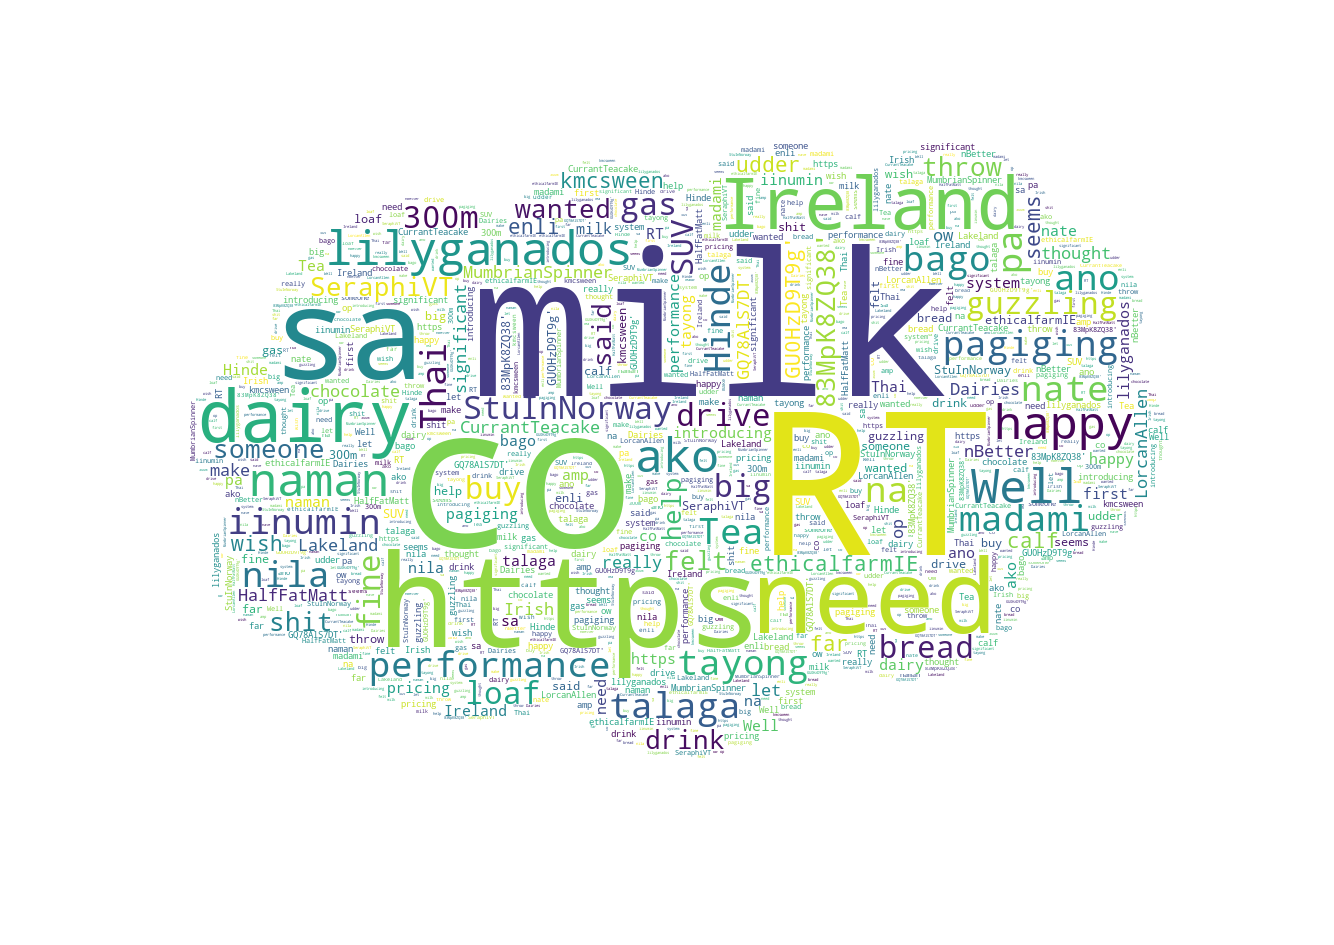

In [191]:
create_wordcloud(df_censored[df_censored["sentiment"]=="positive"]["text"].values, "positive_tweets")

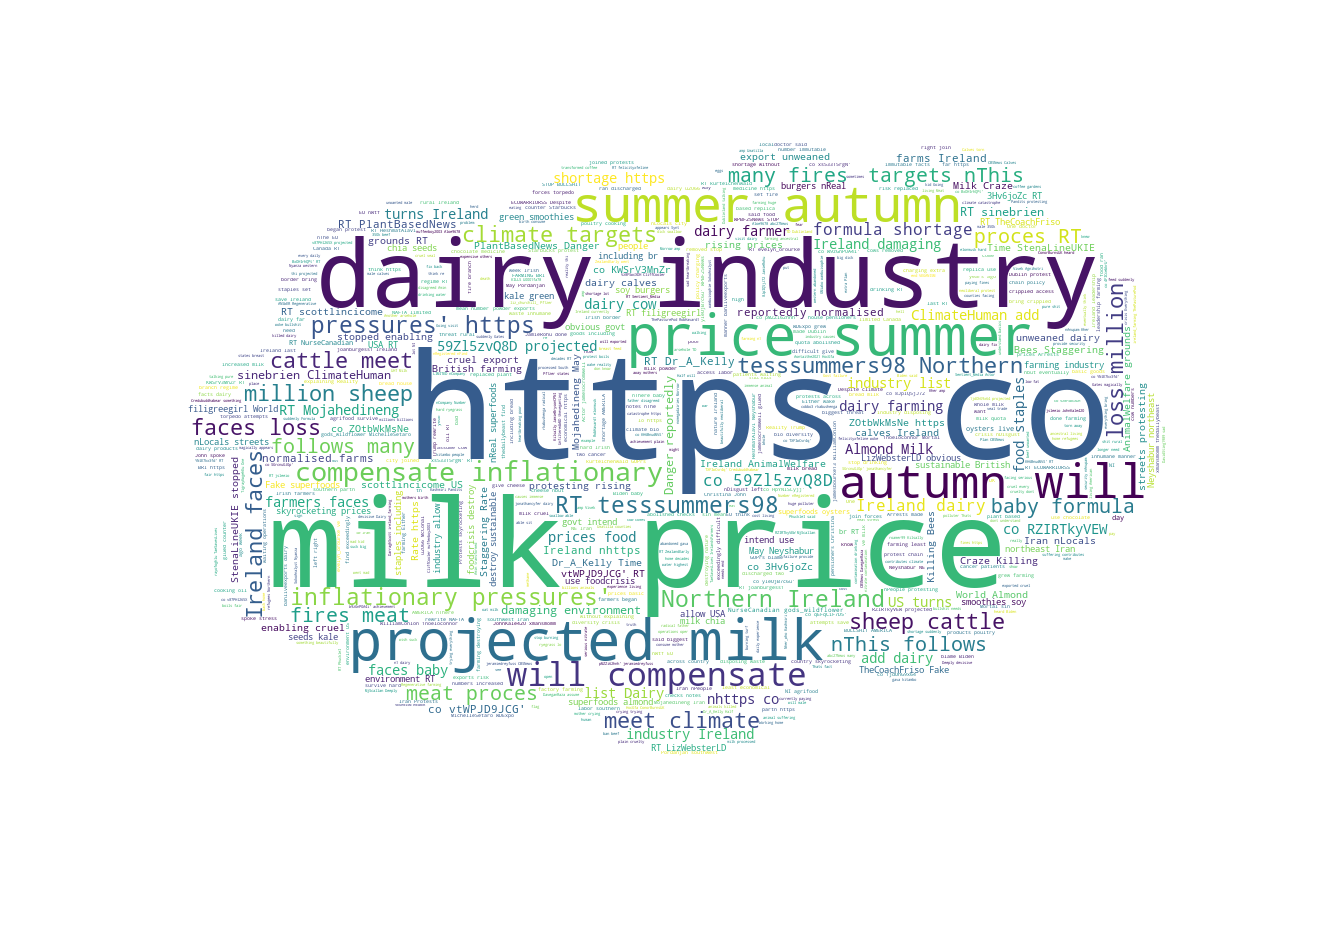

In [192]:
create_wordcloud(df_censored[df_censored["sentiment"]=="negative"]["text"].values, "negative_tweets")

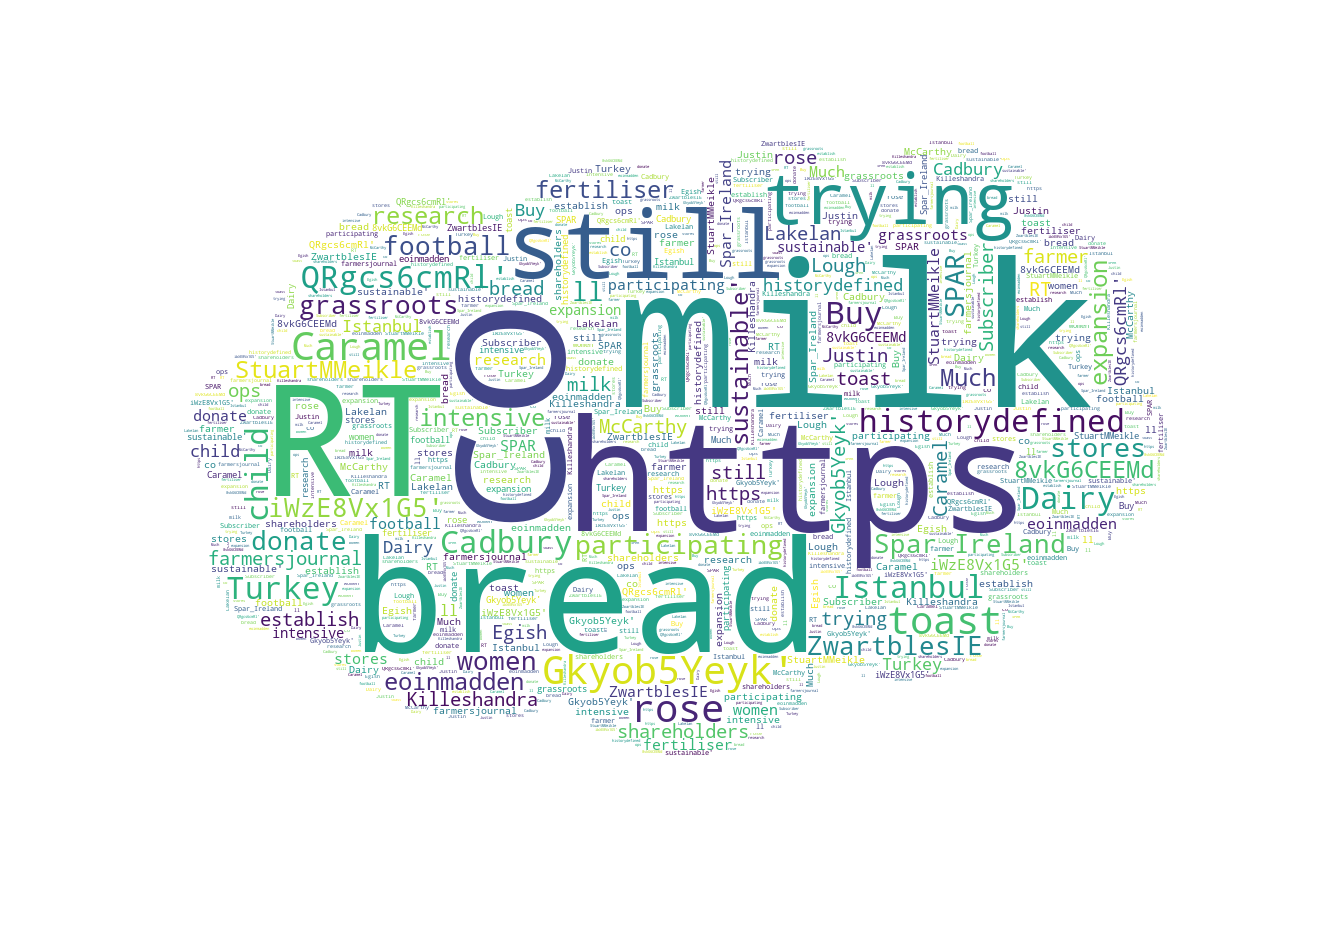

In [193]:
create_wordcloud(df_censored[df_censored["sentiment"]=="neutral"]["text"].values, "neutral_tweets")

In [194]:

.
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub("[0–9]+", "", text)
 return text

df_censored["punct"] = df_censored["formatted_text"].apply(lambda x: remove_punct(x))

#Appliyng tokenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

df_censored['tokenized'] = df_censored['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_censored['nonstop'] = df_censored['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_censored['stemmed'] = df_censored['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df_censored.head()

,text,coord,place,hashtags,formatted_text,sentiment,neg,neu,pos,compound,punct,tokenized,nonstop,stemmed
0,Are they still trying to milk this😂 https://t....,None,None,nan,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000,Are they still trying to milk this,"[are, they, still, trying, to, milk, this, ]","[still, trying, milk, ]","[still, tri, milk, ]"
1,Caramel bread toast with rose milk 🤤🤤🤤❤️❤️❤️❤️,None,None,nan,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000,Caramel bread toast with rose milk,"[caramel, bread, toast, with, rose, milk, ]","[caramel, bread, toast, rose, milk, ]","[caramel, bread, toast, rose, milk, ]"
2,RT @lilyganados: Well happy naman ako sa perfo...,None,None,nan,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003,Well happy naman ako sa performance nila Hin...,"[, well, happy, naman, ako, sa, performance, n...","[, well, happy, naman, ako, sa, performance, n...","[, well, happi, naman, ako, sa, perform, nila,..."
3,RT @historydefined: A child with bread and mil...,None,None,nan,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000,A child with bread and milk Istanbul Turkey...,"[, a, child, with, bread, and, milk, istanbul,...","[, child, bread, milk, istanbul, turkey, 18, ]","[, child, bread, milk, istanbul, turkey, 18, ]"
4,RT @StuInNorway: A big gas-guzzling SUV is fin...,None,None,nan,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027,A big gas guzzling SUV is fine if you need to...,"[, a, big, gas, guzzling, suv, is, fine, if, y...","[, big, gas, guzzling, suv, fine, need, drive,...","[, big, ga, guzzl, suv, fine, need, drive, 3m,..."


In [196]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(,(2,2),20)
n2_bigrams

[('dairy farming', 336),
 ('milk production', 293),
 ('march 2022', 248),
 ('dairy milk', 240),
 ('northern ireland', 240),
 ('farming milk', 233),
 ('production like', 222),
 ('like retweet', 222),
 ('goat farming', 218),
 ('dairy goat', 216),
 ('agricultural input', 205),
 ('input price', 205),
 ('price index', 205),
 ('index shows', 205),
 ('shows fertiliser', 205),
 ('fertiliser prices', 205),
 ('prices 149', 205),
 ('149 year', 205),
 ('year march', 205),
 ('2022 csoir', 204)]

In [199]:
df_censored.to_csv(cwd+"Datasets/sentiment_analysis_complete.csv")

In [198]:
n3_trigrams = get_top_n_gram(df_censored["formatted_text"],(3,3),20)
n3_trigrams

[('farming milk production', 226),
 ('production like retweet', 222),
 ('milk production like', 220),
 ('dairy goat farming', 216),
 ('goat farming milk', 216),
 ('agricultural input price', 205),
 ('input price index', 205),
 ('price index shows', 205),
 ('index shows fertiliser', 205),
 ('shows fertiliser prices', 205),
 ('fertiliser prices 149', 205),
 ('prices 149 year', 205),
 ('149 year march', 205),
 ('year march 2022', 205),
 ('march 2022 csoir', 204),
 ('good morning cruelty', 166),
 ('morning cruelty free', 166),
 ('cruelty free day', 166),
 ('free day vegan', 166),
 ('day vegan environment', 166)]